In [20]:
import glob
import os
import re
from io import StringIO

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import torch
from scipy.spatial import distance
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


%matplotlib inline

In [3]:
input_lines = []
with open('model_data/data/all_data.csv') as f:
    for line in f:
        input_lines.append(line)
        
len(input_lines)

486

In [4]:
output_lines = []
with open('model_data/data/all_data_model.dbow_numnoisewords.2_vecdim.100_batchsize.32_lr.0.001000_epoch.97_loss.0.750086.csv') as f:
    for line in f:
        output_lines.append(line)
        
len(output_lines)

486

In [5]:
matched = []
for line_idx in range(len(output_lines)):
    matched.append((input_lines[line_idx], output_lines[line_idx]))
    
matched_clean = [x for x in matched if not re.match(".*[A-Z].*", x[1])]
matched_clean_vectors = [x[1].split(",") for x in matched_clean[1:]]

vec_matrix = np.array(matched_clean_vectors)
vec_matrix.shape

(481, 100)

In [9]:


distances = distance.cdist([vec_matrix[5]], vec_matrix, "cosine")[0]
# min_index = np.argmin(distances)
ind = np.argpartition(distances, 6)[:6]
sorted_ind = ind[np.argsort(distances[ind])]
min_distances = distances[sorted_ind]
max_similarity = [1 - x for x in min_distances]

In [10]:
max_similarity

[1.0,
 0.9152832855070971,
 0.7431273005523905,
 0.7226447309839709,
 0.7198147633994937,
 0.7198031869993199]

In [17]:
def topNMatches(idx, matrix, n=5):
    
    distances = distance.cdist([matrix[idx]], matrix, "cosine")[0]

    ind = np.argpartition(distances, n+1)[:(n+1)]
    sorted_ind = ind[np.argsort(distances[ind])][1:]
    min_distances = distances[sorted_ind]
    max_similarity = [1 - x for x in min_distances]
    
    return (max_similarity, sorted_ind)

In [22]:
similarity, idxs = topNMatches(5, vec_matrix)

In [26]:
idxs

array([245, 232, 216, 480, 471])

In [34]:
target = matched[5]
matches = [matched[i] for i in idxs]

In [36]:
matches

[('"sklearn_1_10_decision_trees 1.10. Decision Trees modules/tree.html  1.10.3. Multi-output problems  A multi-output problem is a supervised learning problem with several outputs to predict, that is when Y is a 2d array of size . When there is no correlation between the outputs, a very simple way to solve this kind of problem is to build n independent models, i.e. one for each output, and then to use those models to independently predict each one of the n outputs. However, because it is likely that the output values related to the same input are themselves correlated, an often better way is to build a single model capable of predicting simultaneously all n outputs. First, it requires lower training time since only a single estimator is built. Second, the generalization accuracy of the resulting estimator may often be increased. With regard to decision trees, this strategy can readily be used to support multi-output problems. This requires the following changes: Store n output values i

## tsne

<ipython-input-21-26e6ba264fb0>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


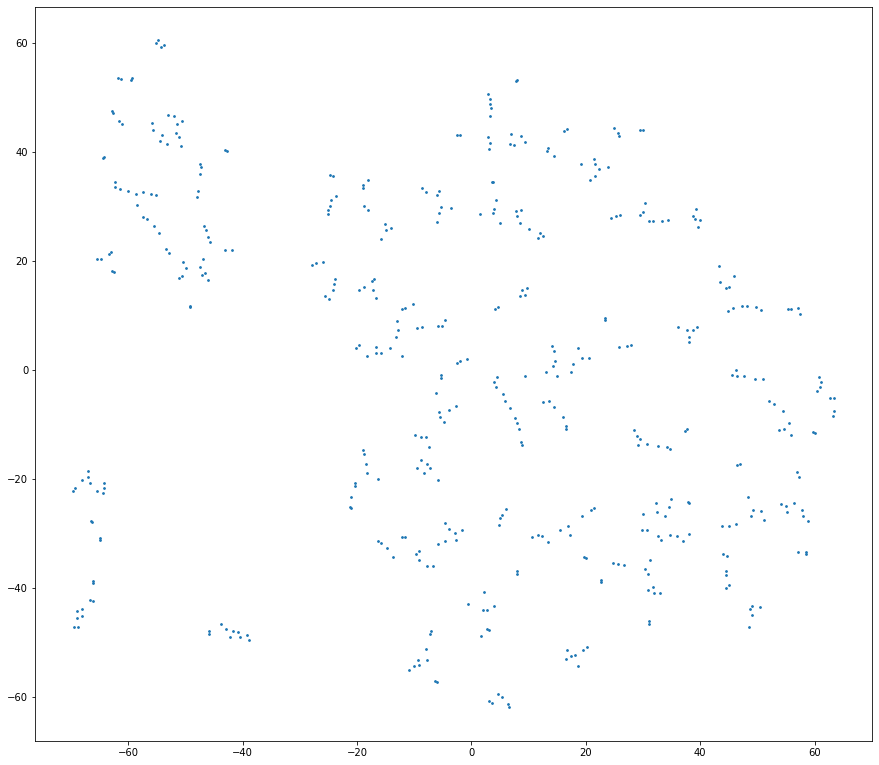

In [21]:
doc_pca = PCA(n_components=5).fit_transform(vec_matrix)
tsne = TSNE(n_components=2, perplexity=5).fit_transform(doc_pca)


fig, ax = plt.subplots()
ax.scatter(tsne[:,0], tsne[:,1],s=3)
# for x, y, token in zip(tsne[:,0],tsne[:,1],mft):
#     ax.annotate(token, xy=(x,y), size=10)

fig.set_size_inches(15,13.5)
fig.show()

